In [1]:
# Import dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
import numpy as np
from splinter import Browser
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as soup

# import below when using Chrome browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
# Set up Browser with Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [4]:
import os
from datetime import datetime as dt

# set local chromedriver
chromedrv = os.path.expanduser('~/ucbDA/chromedriver_win32/chromedriver')

In [5]:
### Step 1: Visit the Website

#Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   #> **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.

In [6]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
html = browser.html
soup = soup(html, 'html.parser')

In [7]:
### Step 2: Scrape the Table

# Create a Beautiful Soup object and use it to scrape the data in the HTML table.

# Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# read table(s) from the website as a pd.DataFrame
pd_mars_df = pd.read_html(url)[0]

In [9]:
 # Find the table
table = soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [ ]:
### Step 3: Store the Data

# Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

# * `id`: the identification number of a single transmission from the Curiosity rover
# * `terrestrial_date`: the date on Earth
# * `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
# * `ls`: the solar longitude
# * `month`: the Martian month
# * `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
# * `pressure`: The atmospheric pressure at Curiosity's location

In [24]:
# Find the header
table_header=table.find_all('th')
headers=[]
for header_ele in table_header:
    title=header_ele.text
    headers.append(title)
    
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [25]:
df=pd.DataFrame(columns=headers)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [26]:
# Find the row data 
for row in table.find_all('tr',class_='data-row'):
        data=row.find_all('td')
        row_data=[td.text.strip() for td in data]
        lenghth=len(df)
        df.loc[lenghth]=row_data
        
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [ ]:
### Step 4: Prepare Data for Analysis

# Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  # > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.

In [28]:
# Check data types
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [30]:
# Change data types 
df['id']=df['id'].astype(int)
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol']=df['sol'].astype(int)
df['ls']=df['ls'].astype(int)
df['month']=df['month'].astype(int)
df['min_temp']=df['min_temp'].astype(float)
df['pressure']=df['pressure'].astype(float)

# Check data types again 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 87.5 KB


In [29]:
# convert data to the appropriate data type
pd_mars_df['terrestrial_date'] = pd.to_datetime(pd_mars_df['terrestrial_date'])
pd_mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
 7   ls_rad            1867 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 116.8 KB


In [13]:
pd_mars_df.duplicated().any()

False

In [20]:
# Compare dataframes created by pd.read_html vs splinter/selenium+bs4 methods
if pd_mars_df.equals(pd_mars_df):
    display("Both pd.read_html vs splinter/selenium+bs4 methods matched perfectly.", pd_mars_df.head())
else:
    display(pd_mars_df.dtypes, pd_mars_df.dtypes)

'Both pd.read_html vs splinter/selenium+bs4 methods matched perfectly.'

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [21]:
# convert ls data to radians
pd_mars_df['ls_rad'] = pd_mars_df['ls'] * np.pi / 180
pd_mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure,ls_rad
0,2,2012-08-16,10,155,6,-75.0,739.0,2.705260
1,13,2012-08-17,11,156,6,-76.0,740.0,2.722714
2,24,2012-08-18,12,156,6,-76.0,741.0,2.722714
3,35,2012-08-19,13,157,6,-74.0,732.0,2.740167
4,46,2012-08-20,14,157,6,-74.0,740.0,2.740167


In [33]:
### Step 5: Analyze the Data

# Analyze your dataset by using Pandas functions to answer the following questions:

# 1. How many months exist on Mars?
# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    # * Find the average the minimum daily temperature for all of the months.
    # * Plot the results as a bar chart.
# 4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    # * Find the average the daily atmospheric pressure of all the months.
    # * Plot the results as a bar chart.
# 5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    # * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    # * Visually estimate the result by plotting the daily minimum temperature.

In [23]:
# 1. How many months exist on Mars?
nb_of_months=pd_mars_df['month'].nunique()
print(f'There are', nb_of_months ,'months on Mars.')

There are 12 months on Mars.


In [32]:
# number of Martian months exists on Mars (sorted)
mars_months = np.unique(pd_mars_df['month'])
mars_months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [35]:
# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
first_day_of_data=df['sol'].min()
last_day_of_data = df['sol'].max()
unique_days_date=df['sol'].nunique()
print(f'There are', unique_days_date, 'Martian days worth of data in the dataset', 
      'spreading from day',first_day_of_data, 'to day',last_day_of_data,'. It is worth noting that in some'
     'days data is taken multiple times. ')

There are 1867 Martian days worth of data in the dataset spreading from day 10 to day 1977 . It is worth noting that in somedays data is taken multiple times. 


In [37]:
# get table headers
headers = list(mars_df)
# 3A. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
mintemp_df = pd_mars_df[headers[2:]].groupby('month', as_index=False).mean().sort_values('min_temp')
mintemp_df

,month,sol,ls,min_temp,pressure,ls_rad
2,3,1204.406250,75.010417,-83.307292,877.322917,1.309179
3,4,1244.500000,104.365979,-82.747423,806.329897,1.821530
1,2,1175.853933,44.258427,-79.932584,889.455056,0.772455
4,5,1182.691275,132.885906,-79.308725,748.557047,2.319297
0,1,1077.574713,15.281609,-77.160920,862.488506,0.266714
5,6,750.829932,164.897959,-75.299320,745.054422,2.878012
11,12,990.951807,344.692771,-74.451807,842.156627,6.016024
6,7,715.105634,194.894366,-72.281690,795.105634,3.401548
10,11,947.224638,314.536232,-71.985507,857.014493,5.489693
9,10,1034.669643,286.330357,-71.982143,887.312500,4.997407


In [49]:
pd_mars_df.loc[(pd_mars_df['min_temp'] == pd_mars_df['min_temp'].min()) | (pd_mars_df['min_temp'] == pd_mars_df['min_temp'].max()), headers[1:]]

,terrestrial_date,sol,ls,month,min_temp,pressure,ls_rad
1093,2015-12-09,1188,79,3,-90.0,881.0,1.378810
1582,2017-05-10,1692,2,1,-62.0,820.0,0.034907


In [40]:
# Iterating through the data to find the average minimum temperature for each month
avg_min_temp=[]

for i in range(1,nb_of_months+1):
    weather_per_month={"month_nb":"","avg_min_temp":""}
    avg_min_temp_month=pd_mars_df.loc[pd_mars_df['month']==i]['min_temp'].mean()
    round_avg_min_temp_month = round(avg_min_temp_month,0)
    weather_per_month["month_nb"] = i
    weather_per_month["avg_min_temp"] = round_avg_min_temp_month
    avg_min_temp.append(weather_per_month)    

print(avg_min_temp)   

[{'month_nb': 1, 'avg_min_temp': -77.0}, {'month_nb': 2, 'avg_min_temp': -80.0}, {'month_nb': 3, 'avg_min_temp': -83.0}, {'month_nb': 4, 'avg_min_temp': -83.0}, {'month_nb': 5, 'avg_min_temp': -79.0}, {'month_nb': 6, 'avg_min_temp': -75.0}, {'month_nb': 7, 'avg_min_temp': -72.0}, {'month_nb': 8, 'avg_min_temp': -68.0}, {'month_nb': 9, 'avg_min_temp': -69.0}, {'month_nb': 10, 'avg_min_temp': -72.0}, {'month_nb': 11, 'avg_min_temp': -72.0}, {'month_nb': 12, 'avg_min_temp': -74.0}]


In [45]:
# Export Python list to JSON file
import json
json_mars_temp = json.dumps(avg_min_temp)

# Save json as df file
df_month_temp=pd.read_json(json_mars_temp)
df_month_temp

,month_nb,avg_min_temp
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


In [42]:
# 3A. The coldest month
min_avg_temp = df_month_temp['avg_min_temp'].min()
month_min_temp=df_month_temp.loc[df_month_temp['avg_min_temp']==min_avg_temp]
month_min_temp

,month_nb,avg_min_temp
2,3,-83
3,4,-83


In [43]:
# 3B. The warmest month
max_avg_temp = df_month_temp['avg_min_temp'].max()
month_max_temp=df_month_temp.loc[df_month_temp['avg_min_temp']==max_avg_temp]
month_max_temp

,month_nb,avg_min_temp
7,8,-68


Text(0.5, 1.0, 'Average Temperature per Month')

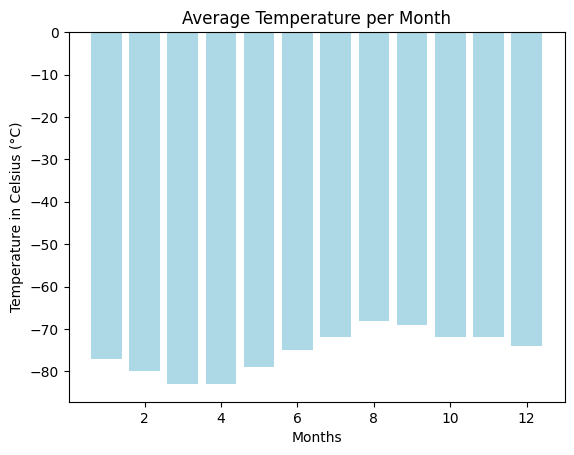

In [62]:
# 3C. Plot the results as a bar chart.
plt.bar(df_month_temp['month_nb'],df_month_temp['avg_min_temp'], color='lightblue')

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Temperature in Celsius (°C)")

# Create title 
plt.title('Average Temperature per Month')

In [63]:
# 4. Which months have the lowest and the highest atmospheric pressure on Mars?
# months on Mars with lowest and highest atmospheric pressure
pressure_df = pd_mars_df[headers[2:]].groupby('month', as_index=False).mean().sort_values('pressure')
pressure_df

,month,sol,ls,min_temp,pressure,ls_rad
5,6,750.829932,164.897959,-75.299320,745.054422,2.878012
4,5,1182.691275,132.885906,-79.308725,748.557047,2.319297
6,7,715.105634,194.894366,-72.281690,795.105634,3.401548
3,4,1244.500000,104.365979,-82.747423,806.329897,1.821530
11,12,990.951807,344.692771,-74.451807,842.156627,6.016024
10,11,947.224638,314.536232,-71.985507,857.014493,5.489693
0,1,1077.574713,15.281609,-77.160920,862.488506,0.266714
7,8,795.333333,224.347518,-68.382979,873.829787,3.915603
2,3,1204.406250,75.010417,-83.307292,877.322917,1.309179
9,10,1034.669643,286.330357,-71.982143,887.312500,4.997407


In [54]:
# Grouping DataFrame by the average of pressure for each month
df_by_month=pd_mars_df.groupby('month')
df_month_pressure=df_by_month.mean().loc[:,['pressure']]
df_month_pressure

C:\Users\Toan Nguyen\AppData\Local\Temp\ipykernel_7100\2016146502.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month_pressure=df_by_month.mean().loc[:,['pressure']]


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [59]:
# 4A. The month with the lowest atmospheric pressure. 
min_avg_pressure= df_month_pressure['pressure'].min()
month_min_pressure=df_month_pressure.loc[df_month_pressure['pressure']==min_avg_pressure]
month_min_pressure

,pressure
month,
6,745.054422


In [60]:
# 4B. The month with the highest atmospheric pressure.  
max_avg_pressure= df_month_pressure['pressure'].max()
month_max_pressure=df_month_pressure.loc[df_month_pressure['pressure']==max_avg_pressure]
month_max_pressure

,pressure
month,
9,913.30597


Text(0.5, 1.0, 'Average Pressure by Month')

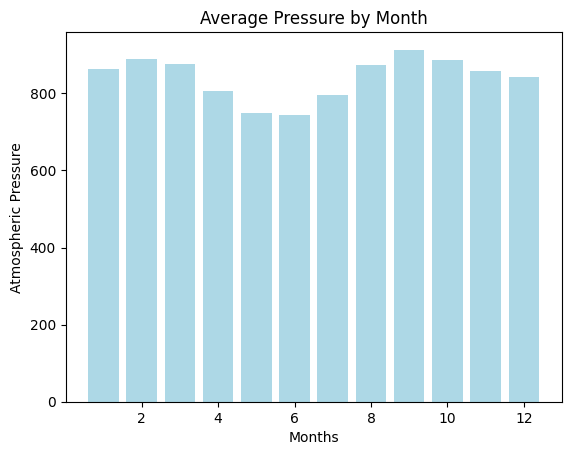

In [71]:
# 4C. Plot the results as a bar chart.
x=range(1,13)
plt.bar(x,df_month_pressure['pressure'], color='lightblue')

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Atmospheric Pressure")

# Create title 
plt.title('Average Pressure by Month')

In [72]:
# Reimport Matplotlib.
import matplotlib
# Reset the style from Matplotlib to default.
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [74]:
#Finding the original Sun longitude
orig_long=pd_mars_df['ls'].loc[0]
orig_long

155

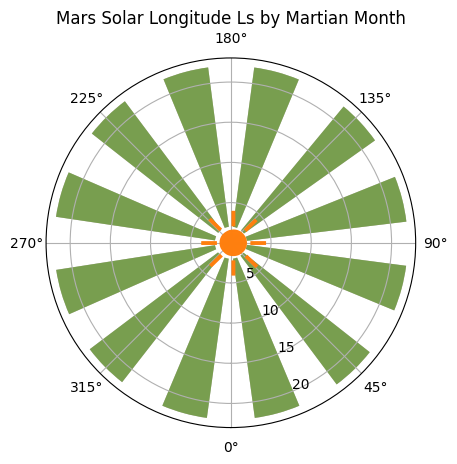

In [81]:
# bar chart on polar axis to show how solar longitudes change phases
theta = mintemp_df['ls_rad']
radii = 20
width = np.pi / len(mars_months)
ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=2.0, alpha=0.5)
ax.set_title('Mars Solar Longitude Ls by Martian Month')
ax.set_theta_zero_location('S')
# sun emoji as the center of the polar projection
ax.set_ylabel(u"\u2600", fontsize=64, color='tab:orange')
ax.yaxis.set_label_coords(np.pi/5, np.pi/6)
# Show Figure
plt.show()

In [77]:
# Knowing that the Sun longitude will be the same after Approximately 1 Martial year
# I am going to find the next rows where longitude is equal the orig_long
same_long=pd_mars_df.loc[pd_mars_df['ls']==orig_long]
same_long

,id,terrestrial_date,sol,ls,month,min_temp,pressure,ls_rad
0,2,2012-08-16,10,155,6,-75.0,739.0,2.70526
598,621,2014-07-03,678,155,6,-77.0,739.0,2.70526
599,624,2014-07-04,679,155,6,-77.0,738.0,2.70526
1249,1274,2016-05-20,1346,155,6,-75.0,737.0,2.70526
1250,1277,2016-05-21,1347,155,6,-75.0,736.0,2.70526


In [78]:
import datetime as dt
from datetime import timedelta
from datetime import datetime

a=same_long['terrestrial_date'].loc[0]
date_after_one_martial_year = same_long['terrestrial_date'].iloc[1]
one_martial_year= date_after_one_martial_year-a
print(f'In one Martial year, nearly ',one_martial_year,'pass on Earth')

In one Martial year, nearly  686 days 00:00:00 pass on Earth


In [85]:
# 4C. Visually estimate the result by plotting the daily minimum temperature vs Martian Days.
plt.bar(pd_mars_df['sol'],pd_mars_df['min_temp'])

# Create labels for the x and y axes.
plt.xlabel("Days")
plt.ylabel("Minimum Temperature ")

# Create title 
plt.title('Daily minimum temperature')

Text(0.5, 1.0, 'Daily minimum temperature')

In [87]:
# Export the DataFrame to a CSV file
df.to_csv('mars_table.csv',index=False)